# Chapter 10 – Introduction to Artificial Neural Networks

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [29]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

/Users/hangjun_xu/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [25]:
y_pred = per_clf.predict([[2, 0.5]])

/Users/hangjun_xu/.local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


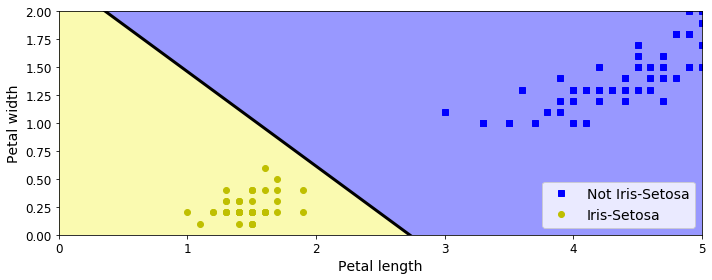

In [32]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [33]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)                                

Saving figure activation_functions_plot


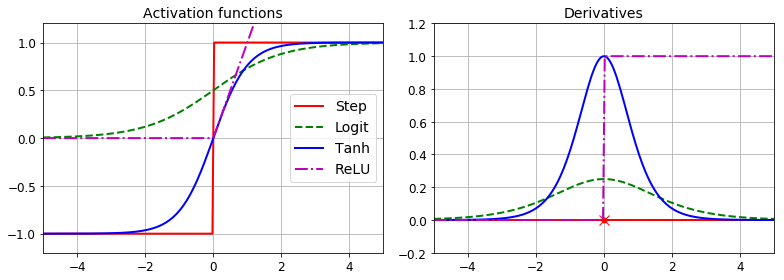

In [34]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [35]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

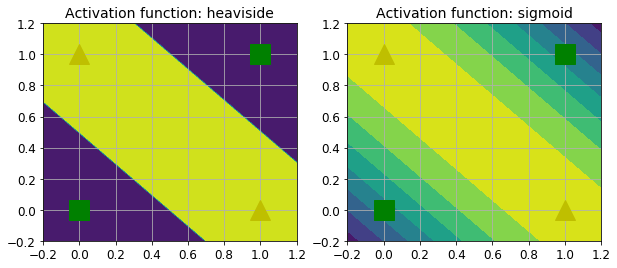

In [36]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using tf.learn

In [53]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [61]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11b83bf98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/zc/c024qb1j19s5blmjkt_b8pzr0000gn/T/tmp9lqjj3lw'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/zc/c024qb1j19s5blmjkt_b8pzr0000gn/T/tmp9lqjj3lw/model.ckpt.
INFO:tensorflow:loss = 2.2865596, ste

INFO:tensorflow:global_step/sec: 557.494
INFO:tensorflow:loss = 0.023617296, step = 7201 (0.179 sec)
INFO:tensorflow:global_step/sec: 529.12
INFO:tensorflow:loss = 0.0057689724, step = 7301 (0.189 sec)
INFO:tensorflow:global_step/sec: 543.218
INFO:tensorflow:loss = 0.019554693, step = 7401 (0.184 sec)
INFO:tensorflow:global_step/sec: 566.249
INFO:tensorflow:loss = 0.0028316763, step = 7501 (0.176 sec)
INFO:tensorflow:global_step/sec: 510.276
INFO:tensorflow:loss = 0.0290098, step = 7601 (0.196 sec)
INFO:tensorflow:global_step/sec: 548.881
INFO:tensorflow:loss = 0.012490218, step = 7701 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.982
INFO:tensorflow:loss = 0.004221091, step = 7801 (0.181 sec)
INFO:tensorflow:global_step/sec: 544.888
INFO:tensorflow:loss = 0.011796335, step = 7901 (0.184 sec)
INFO:tensorflow:global_step/sec: 562.955
INFO:tensorflow:loss = 0.0031221367, step = 8001 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.157
INFO:tensorflow:loss = 0.020210136, step = 8101 (0

INFO:tensorflow:loss = 0.0016350342, step = 15201 (0.163 sec)
INFO:tensorflow:global_step/sec: 616.849
INFO:tensorflow:loss = 0.0031969673, step = 15301 (0.162 sec)
INFO:tensorflow:global_step/sec: 615.476
INFO:tensorflow:loss = 0.003476299, step = 15401 (0.162 sec)
INFO:tensorflow:global_step/sec: 610.076
INFO:tensorflow:loss = 0.0063731237, step = 15501 (0.164 sec)
INFO:tensorflow:global_step/sec: 610.285
INFO:tensorflow:loss = 0.0043329024, step = 15601 (0.164 sec)
INFO:tensorflow:global_step/sec: 594.486
INFO:tensorflow:loss = 0.009507208, step = 15701 (0.168 sec)
INFO:tensorflow:global_step/sec: 613.234
INFO:tensorflow:loss = 0.00094377506, step = 15801 (0.163 sec)
INFO:tensorflow:global_step/sec: 610.133
INFO:tensorflow:loss = 0.0004562597, step = 15901 (0.164 sec)
INFO:tensorflow:global_step/sec: 605.917
INFO:tensorflow:loss = 0.008790955, step = 16001 (0.165 sec)
INFO:tensorflow:global_step/sec: 559.97
INFO:tensorflow:loss = 0.002252589, step = 16101 (0.179 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.0017352236, step = 23201 (0.175 sec)
INFO:tensorflow:global_step/sec: 546.441
INFO:tensorflow:loss = 0.002226826, step = 23301 (0.182 sec)
INFO:tensorflow:global_step/sec: 576.715
INFO:tensorflow:loss = 0.0007256684, step = 23401 (0.173 sec)
INFO:tensorflow:global_step/sec: 526.935
INFO:tensorflow:loss = 0.00059190457, step = 23501 (0.190 sec)
INFO:tensorflow:global_step/sec: 502.755
INFO:tensorflow:loss = 0.00066422636, step = 23601 (0.199 sec)
INFO:tensorflow:global_step/sec: 489.438
INFO:tensorflow:loss = 0.0004310972, step = 23701 (0.204 sec)
INFO:tensorflow:global_step/sec: 528.762
INFO:tensorflow:loss = 0.0011430397, step = 23801 (0.189 sec)
INFO:tensorflow:global_step/sec: 542.896
INFO:tensorflow:loss = 0.0017941196, step = 23901 (0.184 sec)
INFO:tensorflow:global_step/sec: 555.368
INFO:tensorflow:loss = 0.0010763649, step = 24001 (0.180 sec)
INFO:tensorflow:global_step/sec: 547.528
INFO:tensorflow:loss = 0.0005140181, step = 24101 (0.183 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 617.802
INFO:tensorflow:loss = 0.00037729822, step = 31201 (0.162 sec)
INFO:tensorflow:global_step/sec: 616.105
INFO:tensorflow:loss = 0.0007811908, step = 31301 (0.162 sec)
INFO:tensorflow:global_step/sec: 618.612
INFO:tensorflow:loss = 0.001277635, step = 31401 (0.162 sec)
INFO:tensorflow:global_step/sec: 623.597
INFO:tensorflow:loss = 0.00018046824, step = 31501 (0.160 sec)
INFO:tensorflow:global_step/sec: 609.588
INFO:tensorflow:loss = 0.00028529283, step = 31601 (0.164 sec)
INFO:tensorflow:global_step/sec: 616.907
INFO:tensorflow:loss = 0.00062832556, step = 31701 (0.162 sec)
INFO:tensorflow:global_step/sec: 623.772
INFO:tensorflow:loss = 0.00030795197, step = 31801 (0.160 sec)
INFO:tensorflow:global_step/sec: 605.503
INFO:tensorflow:loss = 0.00078143226, step = 31901 (0.165 sec)
INFO:tensorflow:global_step/sec: 615.574
INFO:tensorflow:loss = 0.0005259356, step = 32001 (0.162 sec)
INFO:tensorflow:global_step/sec: 617.783
INFO:tensorflow:loss = 0.00

INFO:tensorflow:loss = 0.00092111423, step = 39101 (0.183 sec)
INFO:tensorflow:global_step/sec: 571.044
INFO:tensorflow:loss = 0.00040538423, step = 39201 (0.175 sec)
INFO:tensorflow:global_step/sec: 590.34
INFO:tensorflow:loss = 0.000336163, step = 39301 (0.169 sec)
INFO:tensorflow:global_step/sec: 587.396
INFO:tensorflow:loss = 0.0005468019, step = 39401 (0.170 sec)
INFO:tensorflow:global_step/sec: 591.989
INFO:tensorflow:loss = 0.00029204064, step = 39501 (0.169 sec)
INFO:tensorflow:global_step/sec: 590.818
INFO:tensorflow:loss = 0.0005105185, step = 39601 (0.169 sec)
INFO:tensorflow:global_step/sec: 592.147
INFO:tensorflow:loss = 0.00022984853, step = 39701 (0.169 sec)
INFO:tensorflow:global_step/sec: 589.449
INFO:tensorflow:loss = 0.0011348161, step = 39801 (0.170 sec)
INFO:tensorflow:global_step/sec: 589.389
INFO:tensorflow:loss = 0.00074003905, step = 39901 (0.170 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/zc/c024qb1j19s5blmjkt_b8pzr0000gn/T/tmp9lqjj3lw/

SKCompat()

In [64]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/zc/c024qb1j19s5blmjkt_b8pzr0000gn/T/tmp9lqjj3lw/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9829

In [65]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07101056167650813

## Using plain TensorFlow

In [66]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [67]:
reset_graph()

# placeholder nodes to hold the (batch) training data and predictions
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [68]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Now we create a MLP with 2 hidden layers:

In [69]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Note that the `logits` is the output of the neural network _before_ going through the softmax activation function. See that it has no activation associated with it yet. We now define the softmax activation in the following:

In [70]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [71]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [72]:
with tf.name_scope("eval"):
    # whether the targets are in the top K predictions.
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [73]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.88 Test accuracy: 0.9169
1 Train accuracy: 0.92 Test accuracy: 0.9315
2 Train accuracy: 0.92 Test accuracy: 0.9393
3 Train accuracy: 0.96 Test accuracy: 0.9457
4 Train accuracy: 0.92 Test accuracy: 0.9496
5 Train accuracy: 0.94 Test accuracy: 0.953
6 Train accuracy: 0.96 Test accuracy: 0.9563
7 Train accuracy: 0.96 Test accuracy: 0.9579
8 Train accuracy: 0.94 Test accuracy: 0.9605
9 Train accuracy: 0.98 Test accuracy: 0.962
10 Train accuracy: 1.0 Test accuracy: 0.964
11 Train accuracy: 0.9 Test accuracy: 0.9649
12 Train accuracy: 0.98 Test accuracy: 0.9662
13 Train accuracy: 0.98 Test accuracy: 0.9652
14 Train accuracy: 1.0 Test accuracy: 0.9687
15 Train accuracy: 1.0 Test accuracy: 0.9682
16 Train accuracy: 1.0 Test accuracy: 0.9684
17 Train accuracy: 0.96 Test accuracy: 0.9701
18 Train accuracy: 1.0 Test accuracy: 0.9705
19 Train accuracy: 1.0 Test accuracy: 0.9712
20 Train accuracy: 1.0 Test accuracy: 0.9701
21 Train accuracy: 1.0 Test accuracy: 0.9721
22 Train a

In [74]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [75]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [76]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [77]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `f.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the `contrib` module may change or be deleted without notice. The `dense()` function is almost identical to the `ully_connected()` function, except for a few minor differences:

 * several parameters are renamed: scope becomes name, `activation_fn` becomes activation (and similarly the `_fn` suffix is removed from other parameters such as `ormalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
 * the default activation is now `None` rather than `f.nn.relu`.
 * a few more differences are presented in chapter 11.
 
We now re-training the above network using the `dense()` API without having to construct each layer manually:

In [78]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

# placeholder nodes to hold the (batch) training data and predictions
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [79]:
# only different part compared to the above
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [80]:
# loss function
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [82]:
# train op
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [83]:
# eval op
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [84]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.92 Test accuracy: 0.9026
1 Train accuracy: 0.88 Test accuracy: 0.9175
2 Train accuracy: 0.94 Test accuracy: 0.9302
3 Train accuracy: 0.9 Test accuracy: 0.9384
4 Train accuracy: 0.92 Test accuracy: 0.9435
5 Train accuracy: 0.96 Test accuracy: 0.948
6 Train accuracy: 0.92 Test accuracy: 0.9521
7 Train accuracy: 1.0 Test accuracy: 0.9535
8 Train accuracy: 0.96 Test accuracy: 0.9556
9 Train accuracy: 0.94 Test accuracy: 0.9587
10 Train accuracy: 0.94 Test accuracy: 0.9611
11 Train accuracy: 0.96 Test accuracy: 0.9627
12 Train accuracy: 1.0 Test accuracy: 0.9638
13 Train accuracy: 0.96 Test accuracy: 0.9656
14 Train accuracy: 0.98 Test accuracy: 0.9669
15 Train accuracy: 0.94 Test accuracy: 0.9681
16 Train accuracy: 0.92 Test accuracy: 0.9686
17 Train accuracy: 0.98 Test accuracy: 0.9695
18 Train accuracy: 1.0 Test accuracy: 0.9705
19 Train accuracy: 1.0 Test accuracy: 0.9699
20 Train accuracy: 0.92 Test accuracy: 0.972
21 Train accuracy: 1.0 Test accuracy: 0.9716
22 Tra

Now that the neural network is trained, you can use it to make predictions. To o that, you can reuse the same construction phase, but change the execution phase like this:

```
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = [...] # some new images scaled between 0 and 1
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis = 1)
```

# Exercise solutions

## Exercise #9

Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

First let's create the deep net. It will have one extra hidden layer than earlier, and we also add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

### Construction

In [143]:
# network topology
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 300
n_hidden3 = 100
n_outputs = 10

In [144]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [145]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

In [146]:
# loss
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [147]:
# train
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [148]:
# eval
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [149]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [150]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [151]:
logdir = log_dir("mnist_dnn")

Now we can create the FileWriter that we will use to write the TensorBoard logs:

In [152]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's input_data() function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define `X_valid` and `y_valid`:

In [153]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

### Execution

In [156]:
m, n = X_train.shape

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 100

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("epochs_without_progress = ", epochs_without_progress, "Early stopping")
                    break

Training was interrupted. Continuing at epoch 146
INFO:tensorflow:Restoring parameters from /tmp/my_deep_mnist_model.ckpt
Epoch: 150 	Validation accuracy: 98.060% 	Loss: 0.08566
Epoch: 155 	Validation accuracy: 98.140% 	Loss: 0.08650
Epoch: 160 	Validation accuracy: 98.100% 	Loss: 0.08733
Epoch: 165 	Validation accuracy: 98.120% 	Loss: 0.08785
Epoch: 170 	Validation accuracy: 98.080% 	Loss: 0.08787
Epoch: 175 	Validation accuracy: 98.120% 	Loss: 0.08822
Epoch: 180 	Validation accuracy: 98.100% 	Loss: 0.08844
Epoch: 185 	Validation accuracy: 98.140% 	Loss: 0.08872
Epoch: 190 	Validation accuracy: 98.160% 	Loss: 0.08957
Epoch: 195 	Validation accuracy: 98.140% 	Loss: 0.08937
Epoch: 200 	Validation accuracy: 98.140% 	Loss: 0.08996
Epoch: 205 	Validation accuracy: 98.100% 	Loss: 0.09030
Epoch: 210 	Validation accuracy: 98.120% 	Loss: 0.09058
Epoch: 215 	Validation accuracy: 98.160% 	Loss: 0.09085
Epoch: 220 	Validation accuracy: 98.120% 	Loss: 0.09162
Epoch: 225 	Validation accuracy: 98.14

In [157]:
os.remove(checkpoint_epoch_path)

### Test Predictions

In [158]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [159]:
accuracy_val

0.9785